In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate 200 random X values between 0 and 10
X = np.random.uniform(0, 10, 200)

# Calculate Y using a quadratic relationship and add some noise
Y = -X**2 + 10*X + np.random.normal(0, 5, 200)

# Convert X and Y into a DataFrame for easier manipulation
df = pd.DataFrame({'X': X, 'Y': Y})

df.head()


,X,Y
0,3.745401,20.025858
1,9.507143,5.846930
2,7.319939,21.083243
3,5.986585,20.454893
4,1.560186,22.496555


In [ ]:
df['X_squared'] = df['X']**2

df.head()

,X,Y,X_squared
0,3.745401,20.025858,14.028030
1,9.507143,5.846930,90.385769
2,7.319939,21.083243,53.581513
3,5.986585,20.454893,35.839198
4,1.560186,22.496555,2.434182


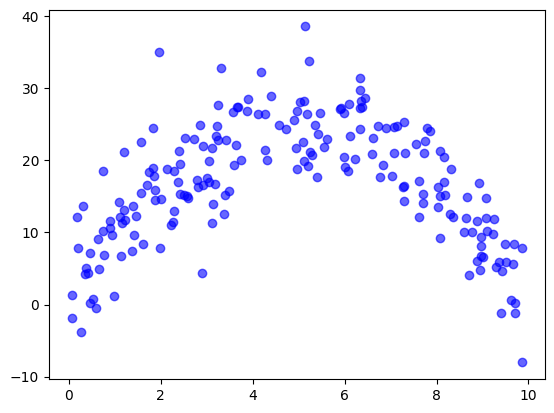

In [ ]:
df_sorted = df.sort_values(by='X')

plt.scatter(df_sorted['X'], df_sorted['Y'], color='blue', label='Actual Data', alpha=0.6)

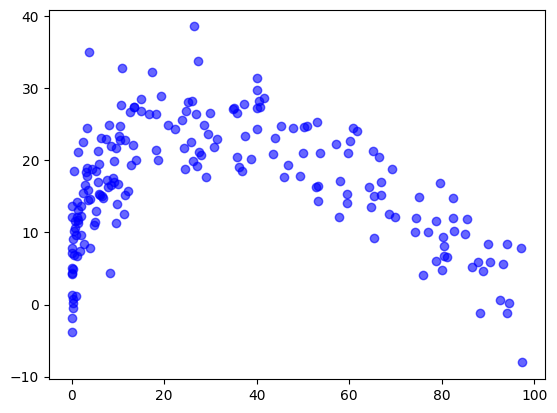

In [ ]:
plt.scatter(df_sorted['X_squared'], df_sorted['Y'], color='blue', label='Actual Data', alpha=0.6)

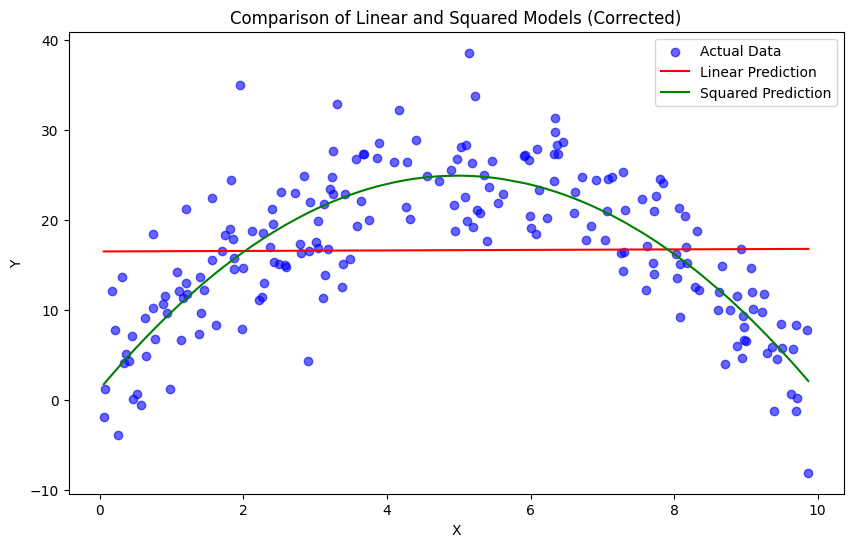

In [ ]:
# Linear model using X
linear_model = LinearRegression()
linear_model.fit(df[['X']], df['Y'])
df['Linear_Prediction'] = linear_model.predict(df[['X']])

# Linear model using X^2
df['X_squared'] = df['X']**2
squared_model = LinearRegression()
squared_model.fit(df[['X', 'X_squared']], df['Y'])
df['Squared_Prediction'] = squared_model.predict(df[['X', 'X_squared']])

# Sort the dataframe by X values for better plotting
df_sorted = df.sort_values(by='X')

# Plot the data and the models with sorted values
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['X'], df_sorted['Y'], color='blue', label='Actual Data', alpha=0.6)
plt.plot(df_sorted['X'], df_sorted['Linear_Prediction'], color='red', label='Linear Prediction')
plt.plot(df_sorted['X'], df_sorted['Squared_Prediction'], color='green', label='Squared Prediction')
plt.title('Comparison of Linear and Squared Models (Corrected)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.skew()['crim']

5.223148798243851

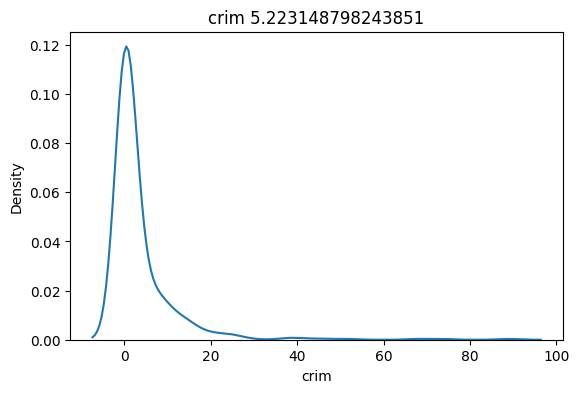

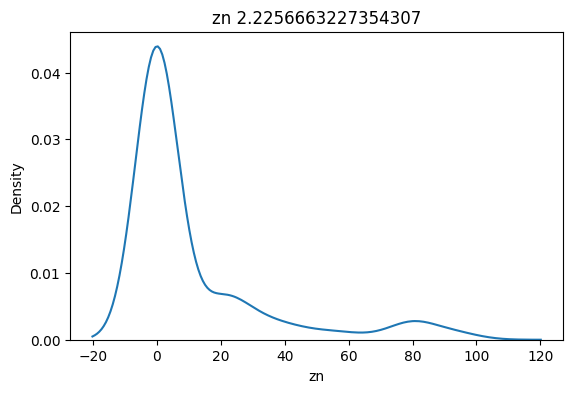

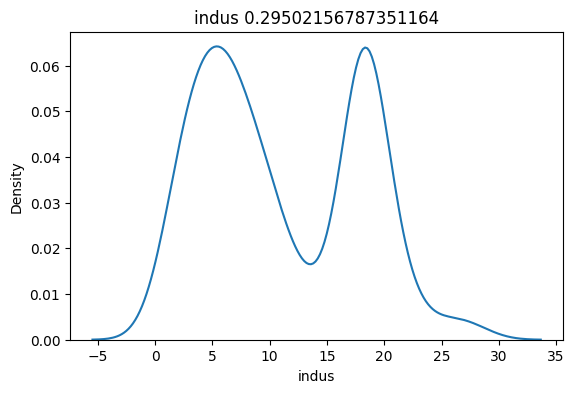

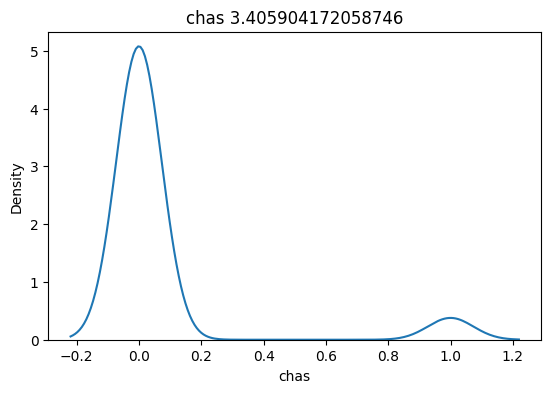

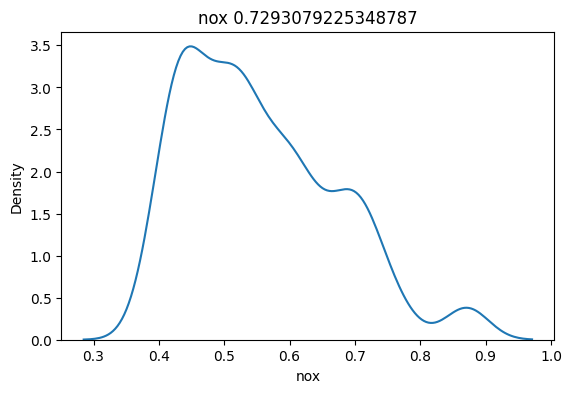

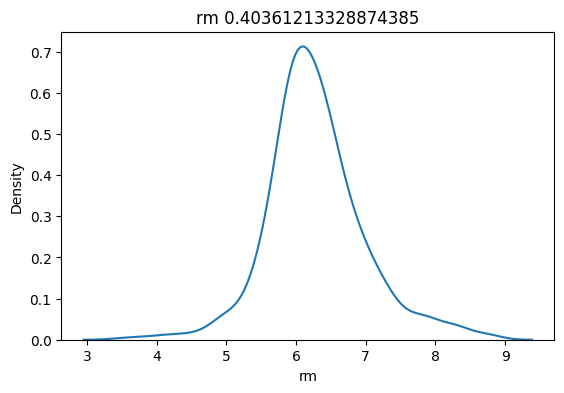

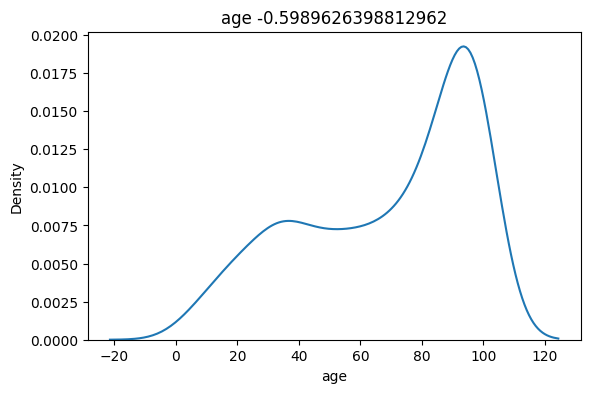

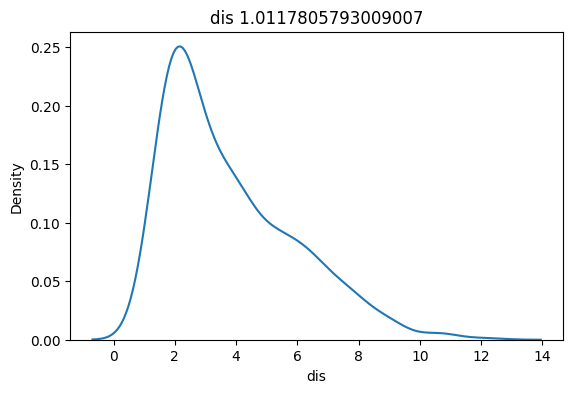

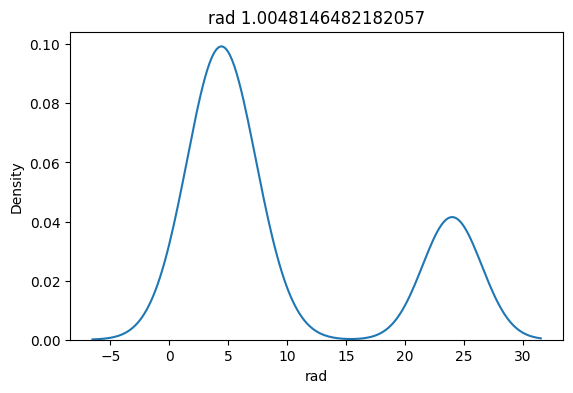

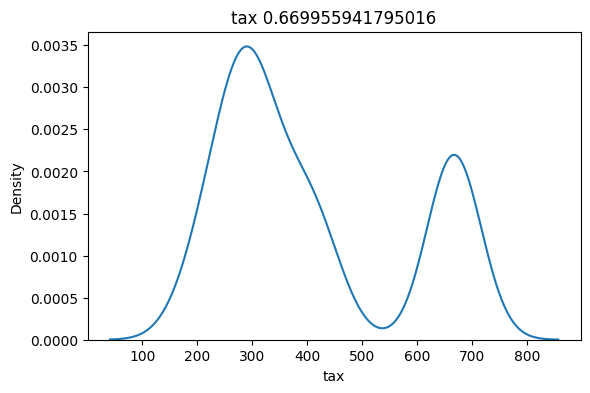

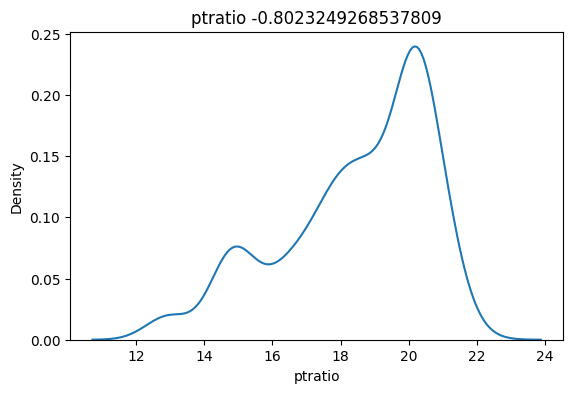

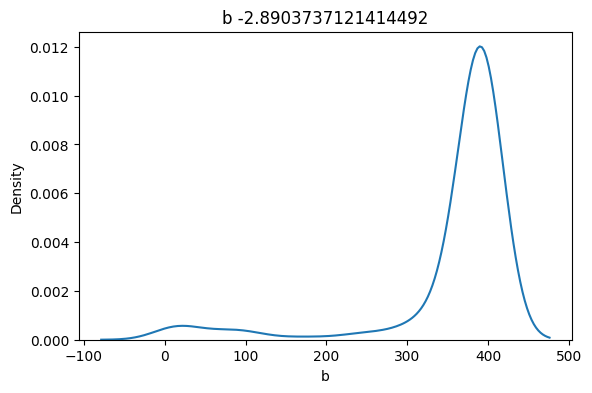

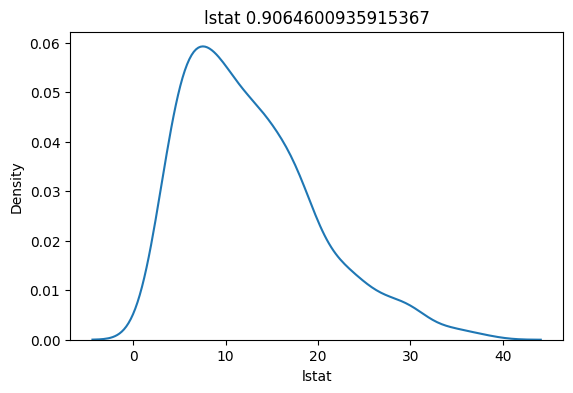

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distplots without any transformation

for col in df.columns[0:-1]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(df[col])
    txt = col + " " + str(df.skew()[col])
    plt.title(txt)
    plt.show()

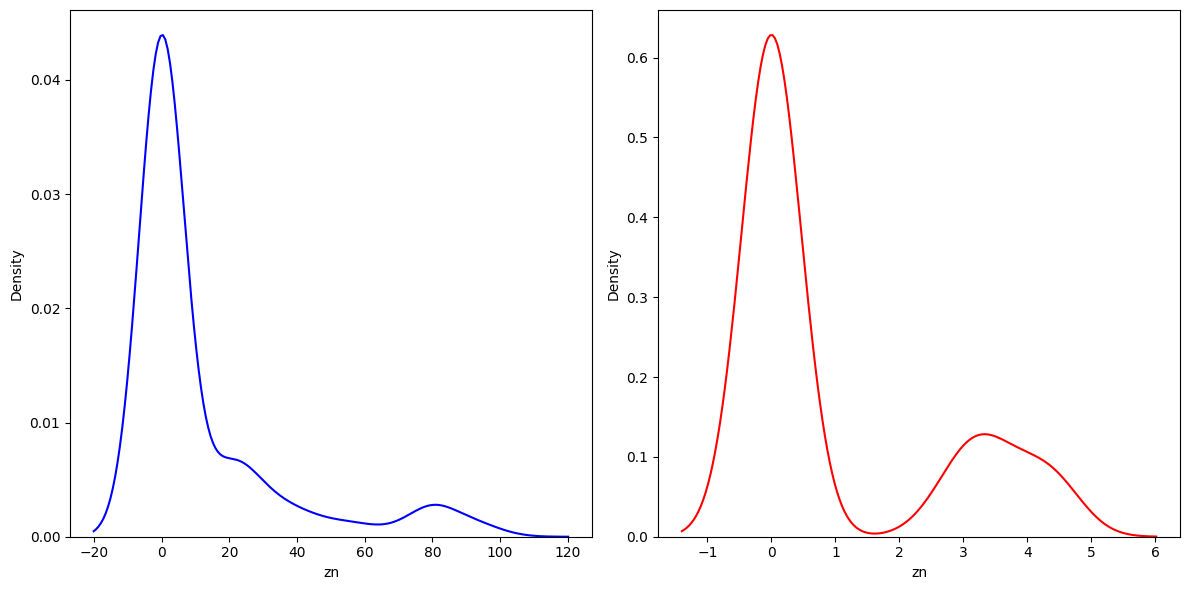

skew before log transform 2.219063057148425
skew after log transform 1.1899105701640726


In [ ]:
# log on zn feature

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['zn'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['zn']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before log transform', skew(df['zn']))
print('skew after log transform', skew(np.log1p(df['zn'])))

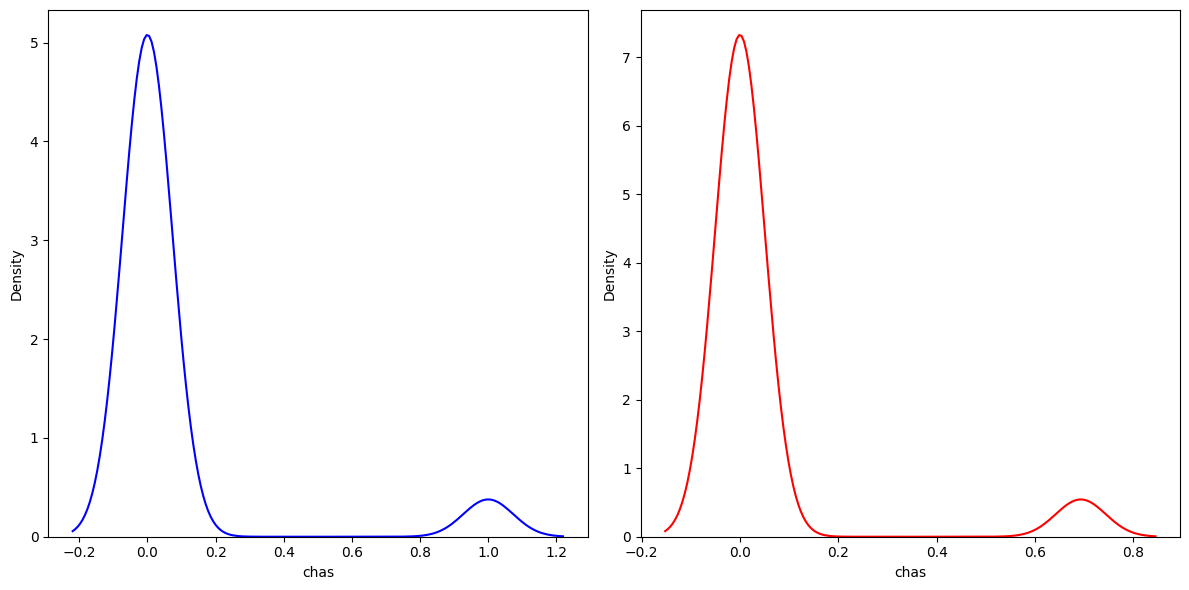

skew before reciprocal transform 3.395799292642519
skew after reciprocal transform 3.3957992926425202


In [ ]:
# log on chas

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['chas'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['chas']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reciprocal transform', skew(df['chas']))
print('skew after reciprocal transform', skew(np.log1p(df['chas'])))

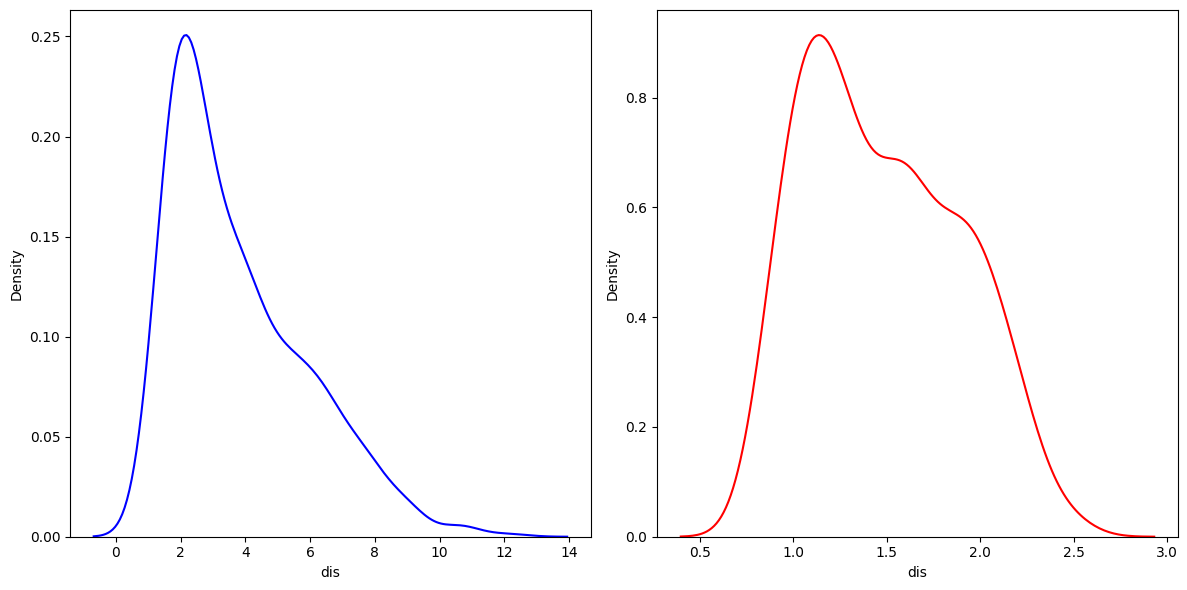

skew before log transform 1.0087787565152246
skew after log transform 0.33057774263430006


In [ ]:
# log on dis

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['dis'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['dis']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before log transform', skew(df['dis']))
print('skew after log transform', skew(np.log1p(df['dis'])))

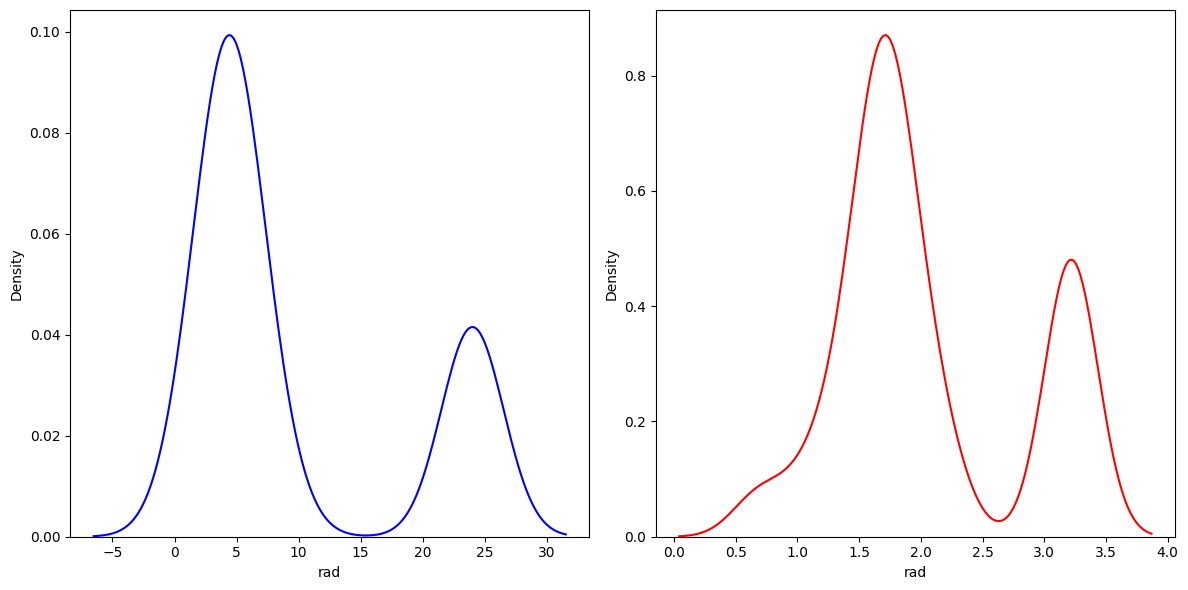

skew before log transform 1.0018334924536951
skew after log transform 0.5311793311965491


In [ ]:
# log on rad

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['rad'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['rad']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before log transform', skew(df['rad']))
print('skew after log transform', skew(np.log1p(df['rad'])))

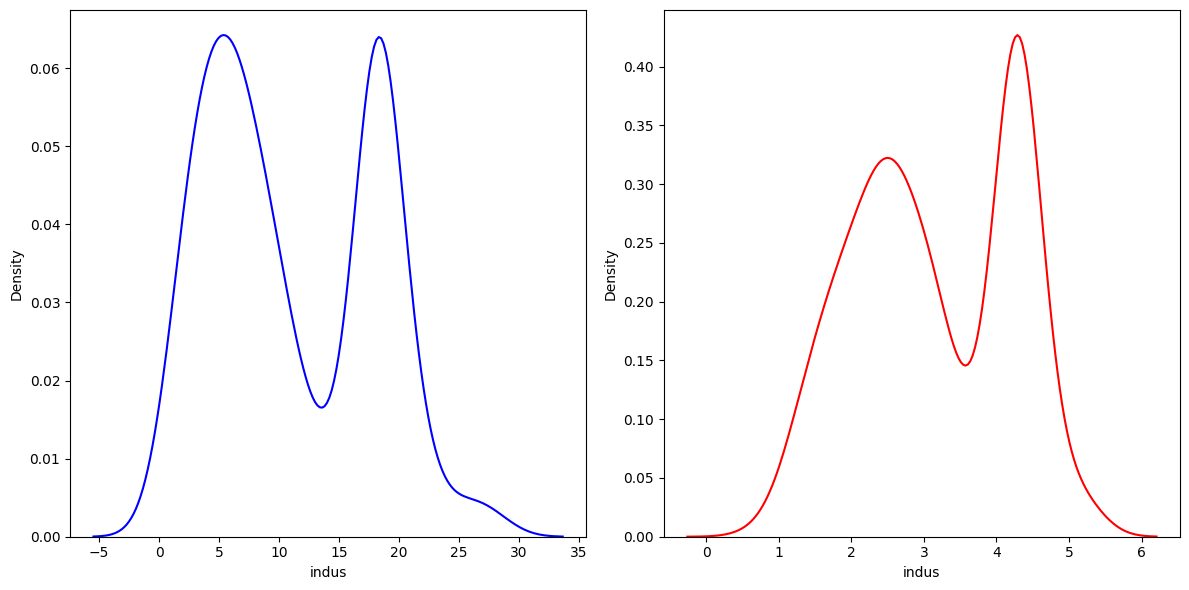

skew before log transform 0.29414627684418543
skew after log transform -0.07239396333108224


In [ ]:
# sqrt on indus

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['indus'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['indus']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['indus']))
print('skew after sqrt transform', skew(np.sqrt(df['indus'])))

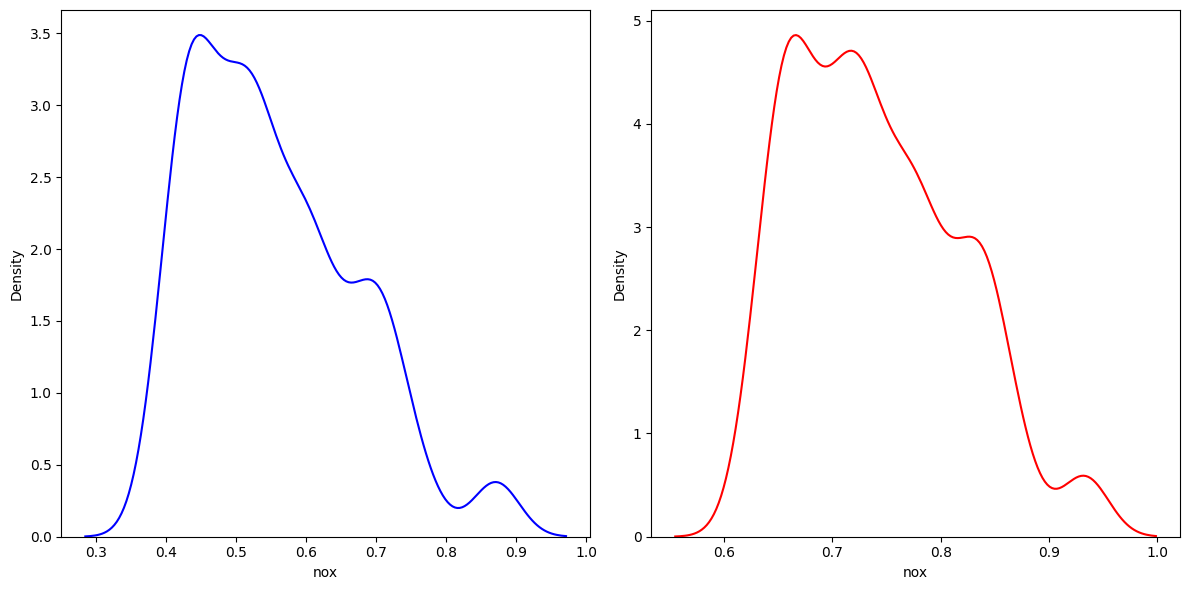

skew before sqrt transform 0.7271441597740319
skew after sqrt transform 0.5351964490014817


In [ ]:
# sqrt on nox

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['nox'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['nox']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['nox']))
print('skew after sqrt transform', skew(np.sqrt(df['nox'])))

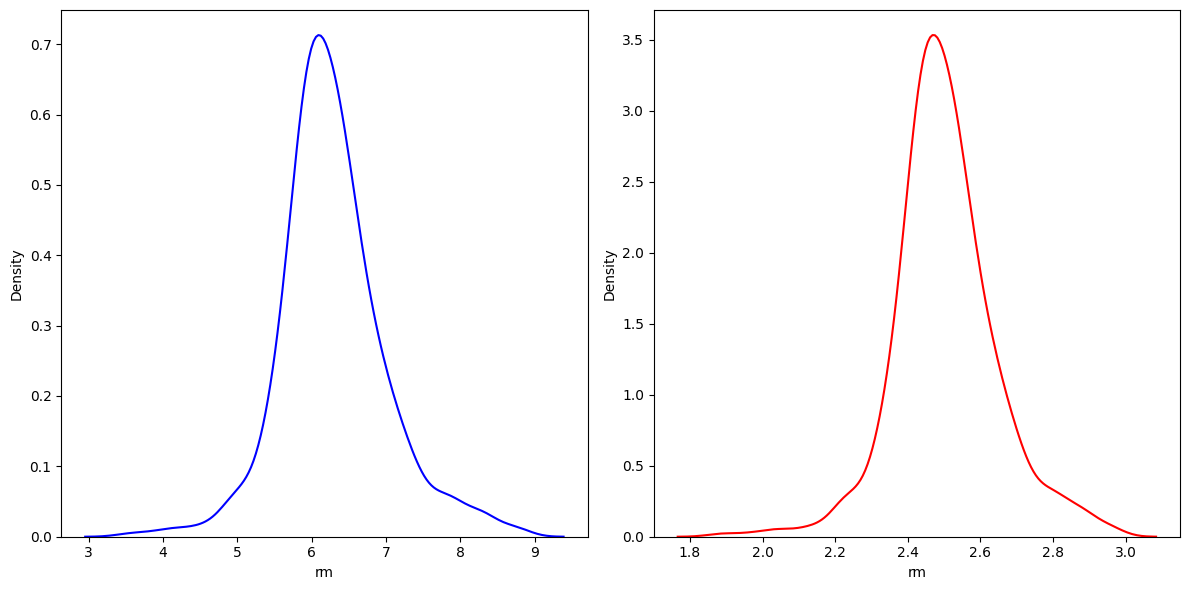

skew before sqrt transform 0.40241466802496245
skew after sqrt transform 0.07249861410468098


In [ ]:
# sqrt on rm

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['rm'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['rm']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['rm']))
print('skew after sqrt transform', skew(np.sqrt(df['rm'])))

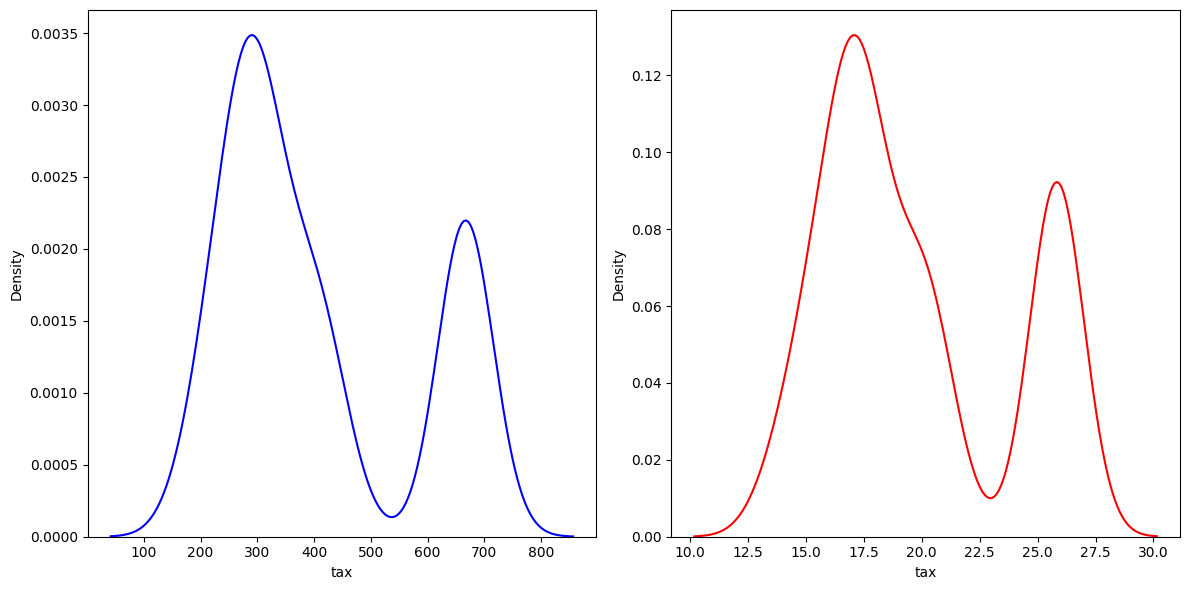

skew before sqrt transform 0.6679682687237768
skew after sqrt transform 0.5202453627239406


In [ ]:
# sqrt on tax

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['tax'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['tax']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['tax']))
print('skew after sqrt transform', skew(np.sqrt(df['tax'])))

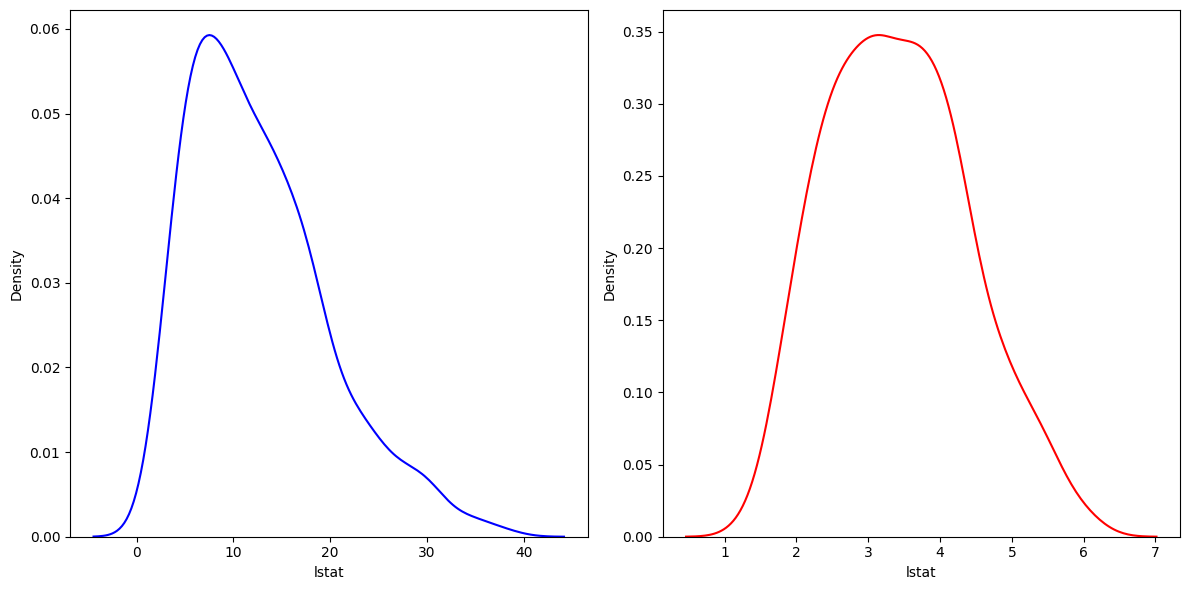

skew before sqrt transform 0.9037707431346133
skew after sqrt transform 0.30647851994358943


In [ ]:
# sqrt on lstat

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['lstat'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['lstat']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['lstat']))
print('skew after sqrt transform', skew(np.sqrt(df['lstat'])))

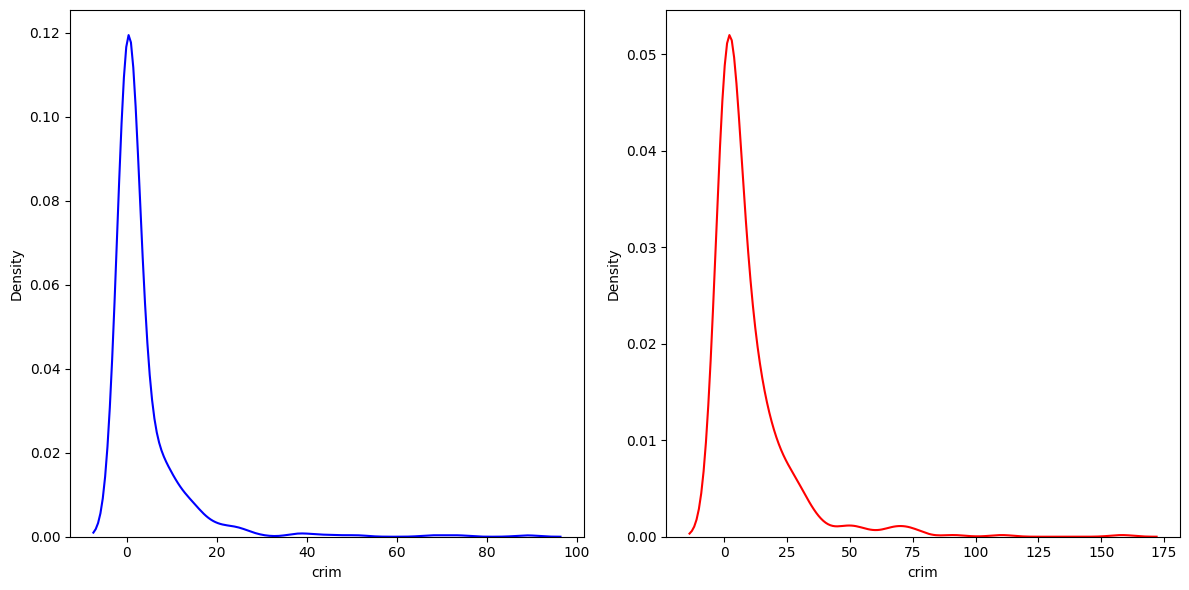

skew before reciprocal transform 5.207652387859715
skew after reciprocal transform 3.733474573321791


In [ ]:
# reciprocal on crim

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['crim'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.reciprocal(df['crim']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reciprocal transform', skew(df['crim']))
print('skew after reciprocal transform', skew(np.reciprocal(df['crim'])))

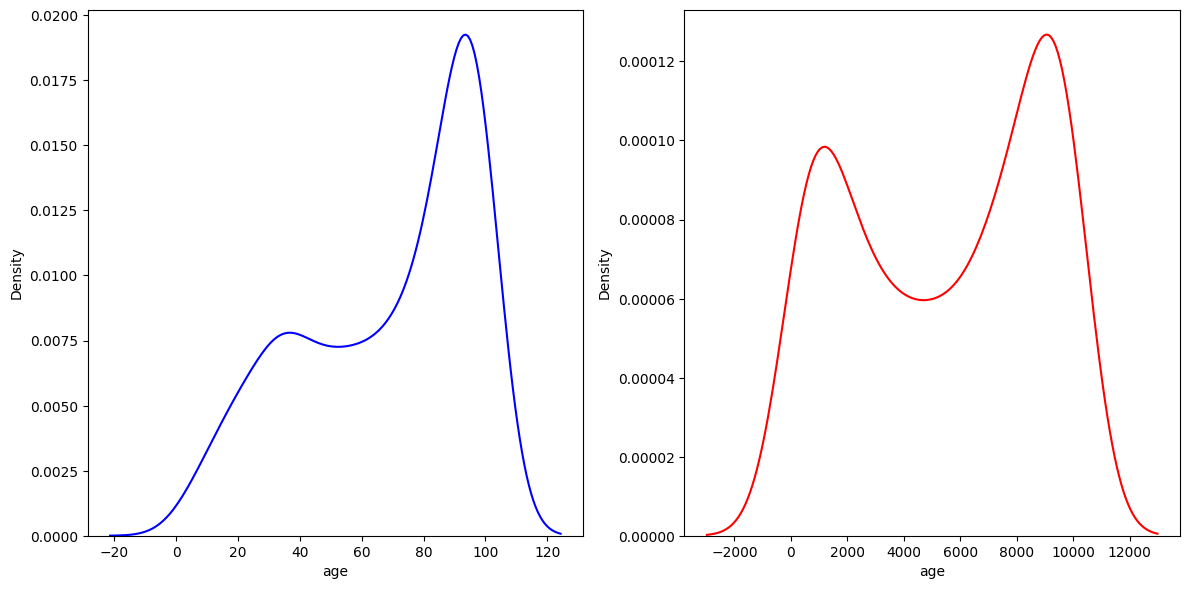

skew before reciprocal transform -0.5971855948016143
skew after reciprocal transform -0.18263633415807376


In [ ]:
# square on age

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['age'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.square(df['age']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reciprocal transform', skew(df['age']))
print('skew after reciprocal transform', skew(np.square(df['age'])))

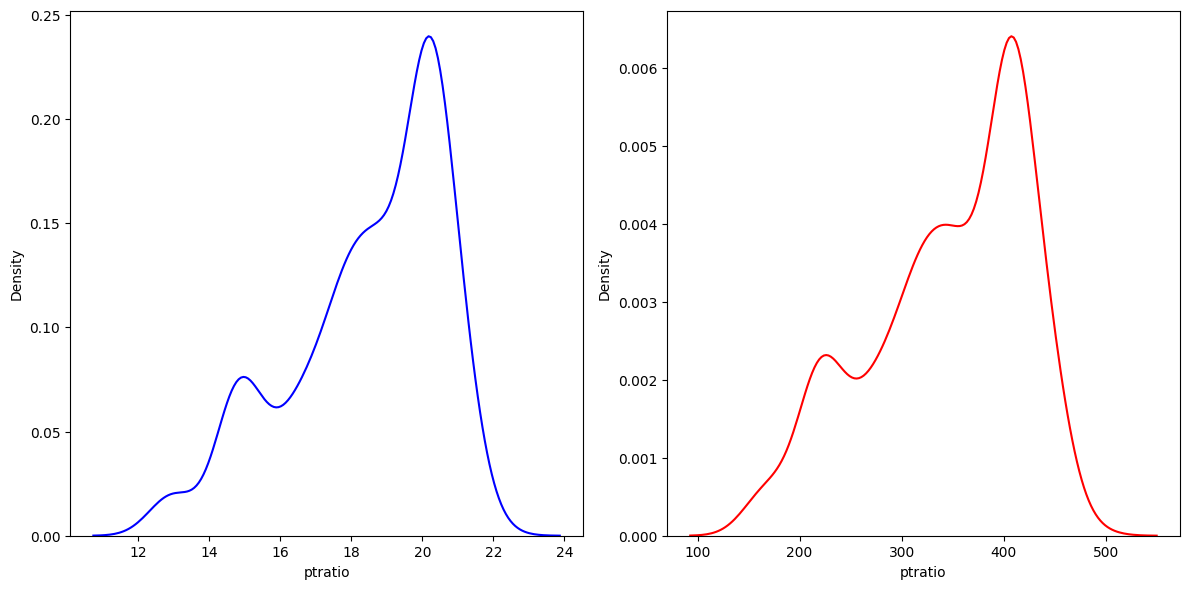

skew before reciprocal transform -0.7999445320367449
skew after reciprocal transform -0.6085086626298968


In [ ]:
# square on ptratio

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['ptratio'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.square(df['ptratio']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reciprocal transform', skew(df['ptratio']))
print('skew after reciprocal transform', skew(np.square(df['ptratio'])))

In [ ]:
-df['b']

0     -396.90
1     -396.90
2     -392.83
3     -394.63
4     -396.90
        ...  
501   -391.99
502   -396.90
503   -396.90
504   -393.45
505   -396.90
Name: b, Length: 506, dtype: float64

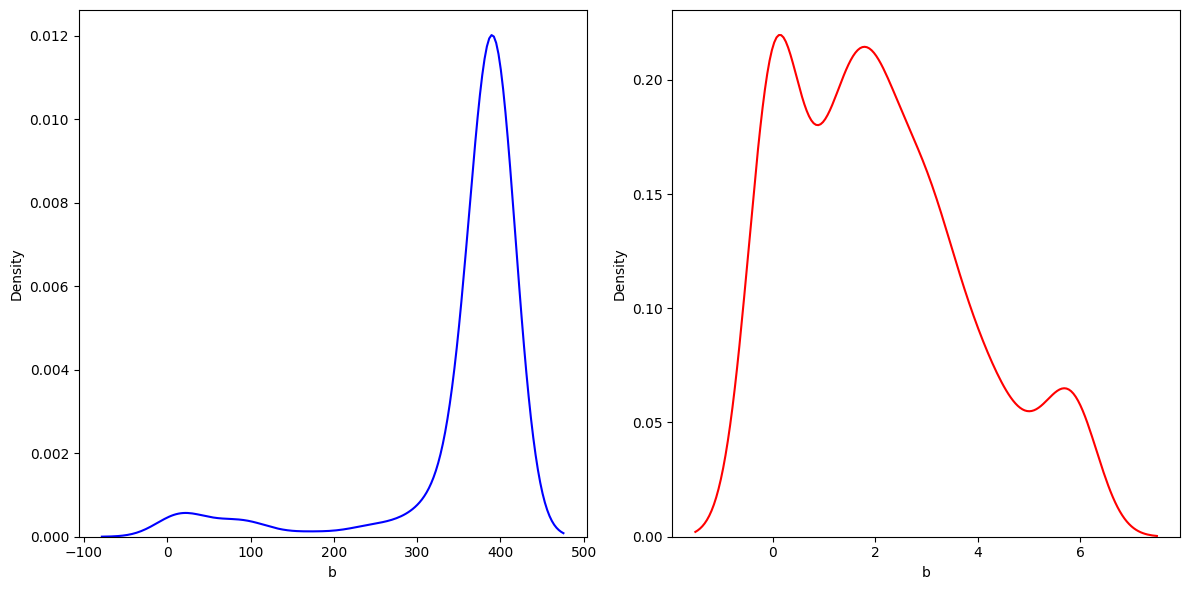

skew before reflect log transform -2.8817983452627716
skew after reflect log transform 0.5995750622214898


In [ ]:
# reflect log on b

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['b'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(-df['b'] + 396.900000001), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reflect log transform', skew(df['b']))
print('skew after reflect log transform', skew(np.log1p(-df['b'] + 396.900000001)))

In [ ]:
# log -> zn, chas, dis, rad
# sqrt -> indus, nox, rm, tax, lstat
# reciprocal -> crim
# square -> age, ptratio
# reflect shift log -> b

In [ ]:
# baseline model

from sklearn.model_selection import train_test_split

# Define your features and target variable
X = df.drop('medv', axis=1)  # Features
y = df['medv']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = reg.predict(X_test)

print('r2 score', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))

r2 score 0.6687594935356326
mse 24.291119474973478


In [ ]:
def reflect_shift_log_transform(x):

    return np.log1p(-x + 396.900000001)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p), ['zn', 'chas', 'dis', 'rad']),
        ('sqrt', FunctionTransformer(np.sqrt), ['indus', 'nox', 'rm', 'tax', 'lstat']),
        ('reciprocal', FunctionTransformer(np.reciprocal), ['crim']),
        ('square', FunctionTransformer(np.square), ['age', 'ptratio']),
        ('reflect_shift_log', FunctionTransformer(reflect_shift_log_transform), ['b']),
    ],
    remainder='passthrough'  # Keeps columns not listed unchanged
)

In [ ]:
X_train_trf = preprocessor.fit_transform(X_train)

In [ ]:
X_test_trf = preprocessor.transform(X_test)

In [ ]:
reg = LinearRegression()

reg.fit(X_train_trf, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test_trf)

print('r2 score', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))

r2 score 0.7219859878030749
mse 20.38781928598069


### Box-Cox Transform

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,crim,-0.114374
1,zn,-0.181510
2,indus,0.389192
3,chas,-1.008349
4,nox,-0.938023
5,rm,0.147907
6,age,1.362922
7,dis,-0.165778
8,rad,-0.134975
9,tax,-0.526450


In [ ]:
reg = LinearRegression()

reg.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test_transformed)

print('r2 score', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))

r2 score 0.7321931094639539
mse 19.639292439410752


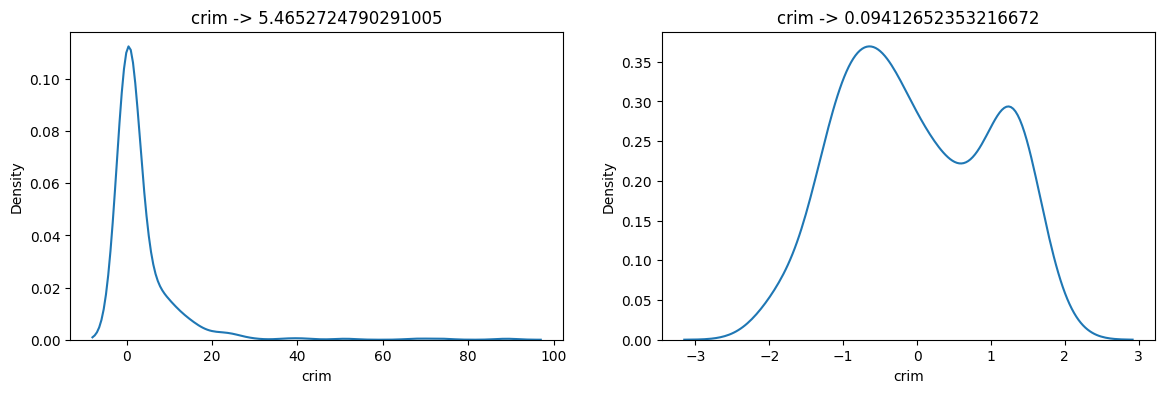

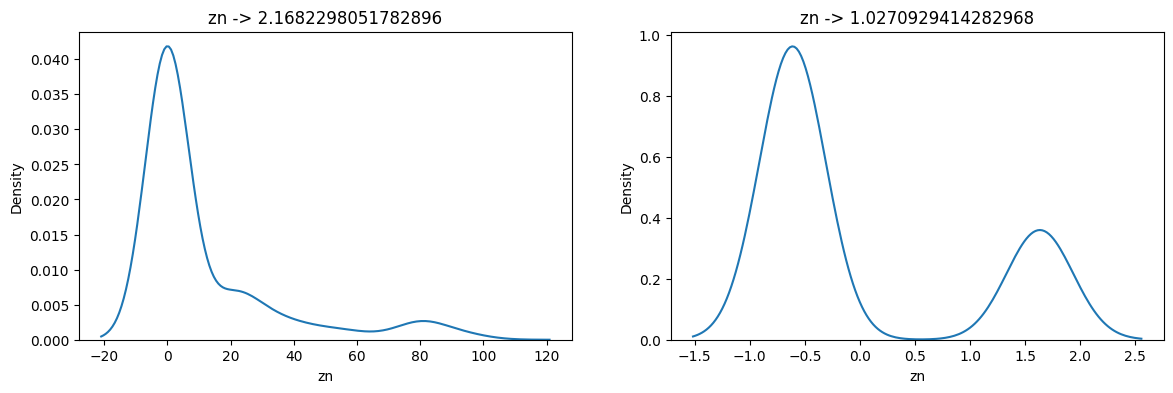

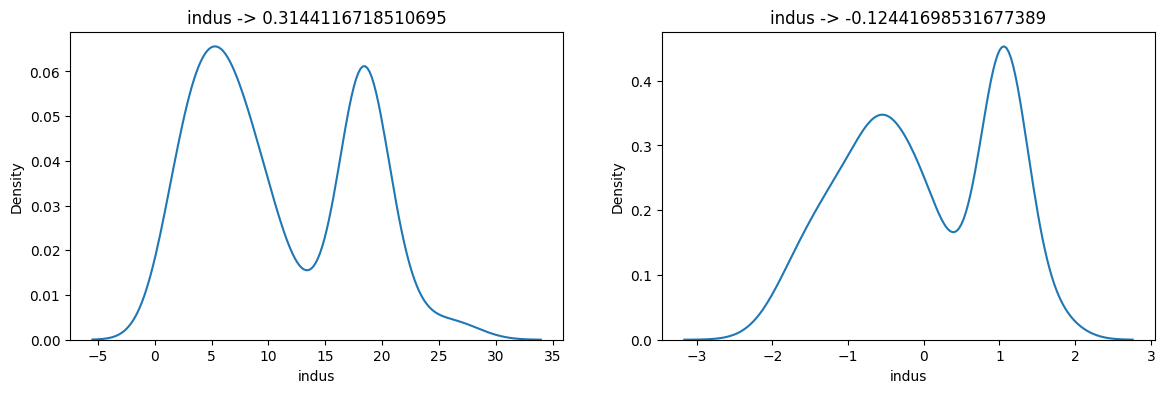

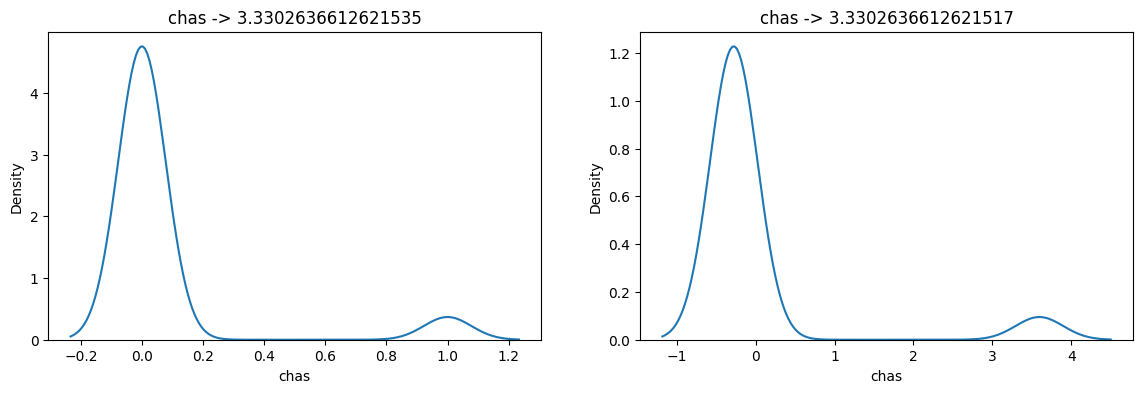

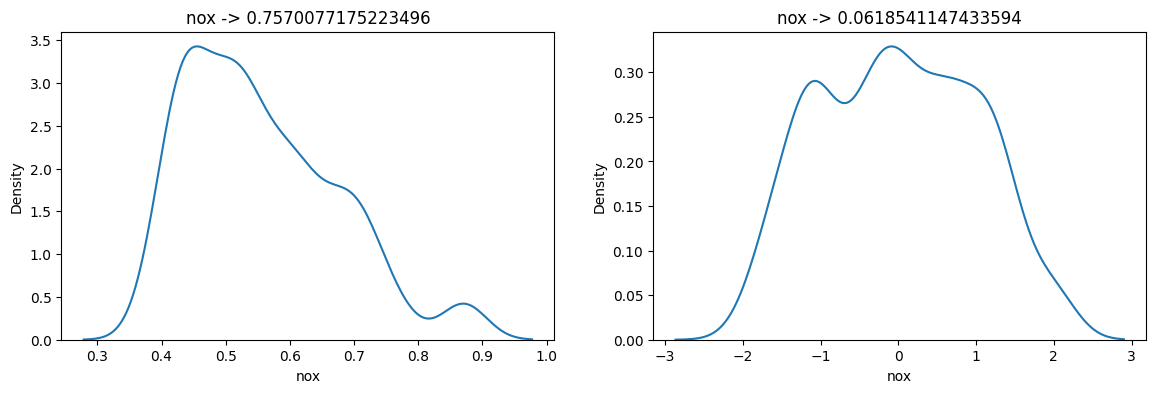

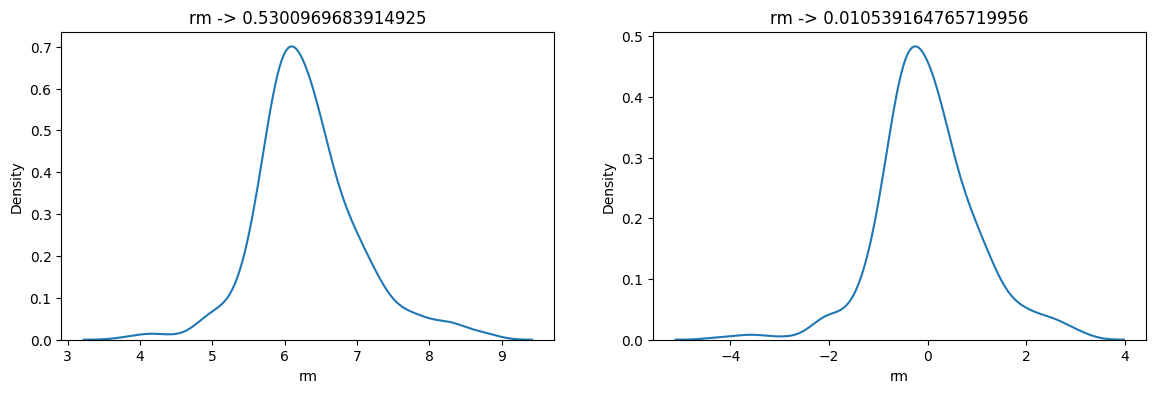

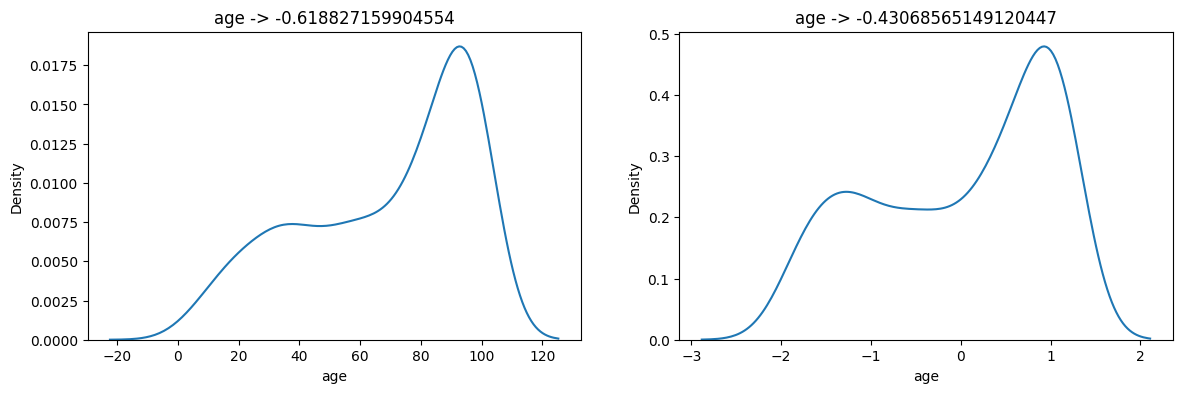

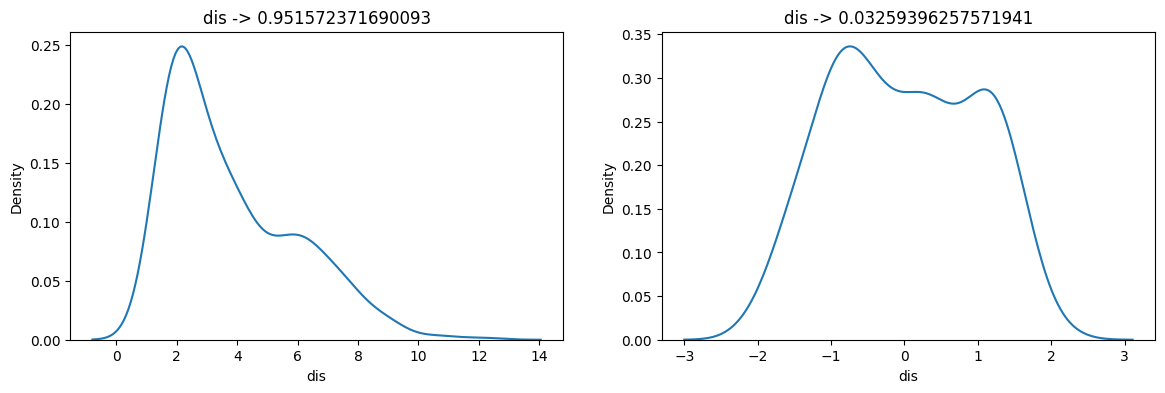

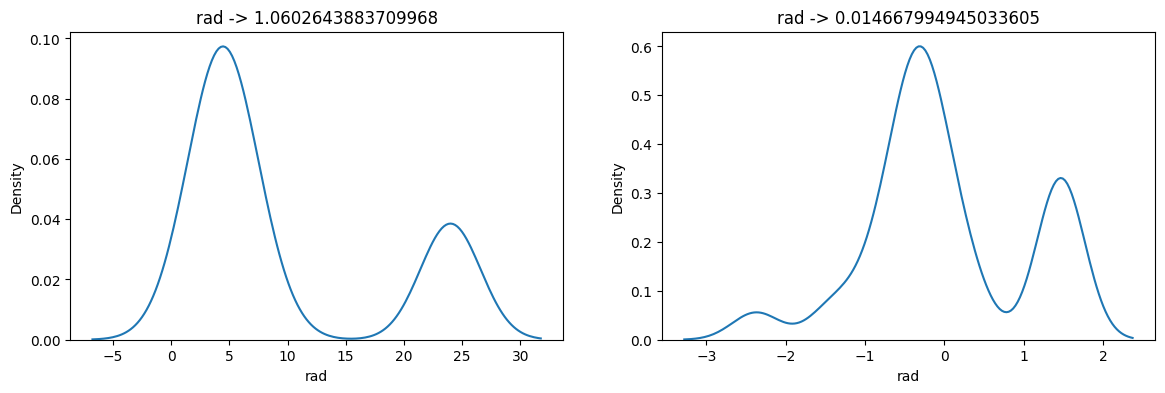

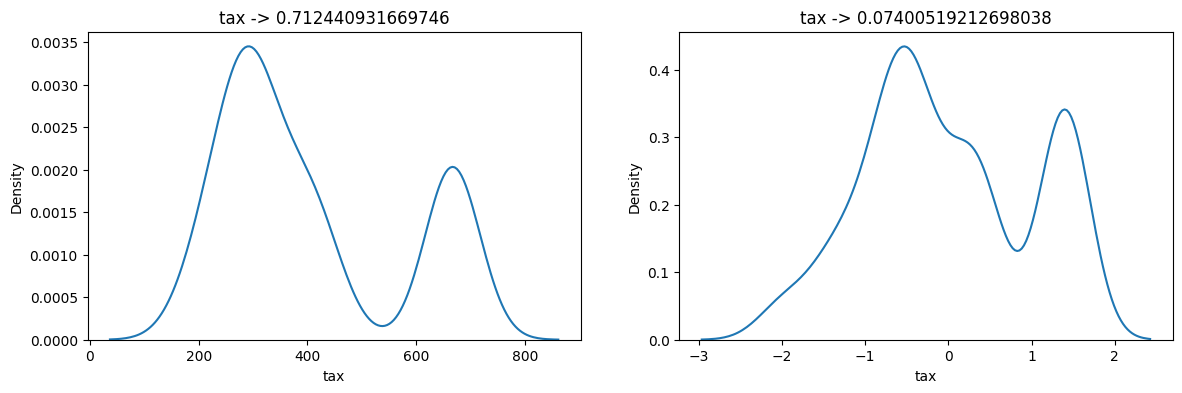

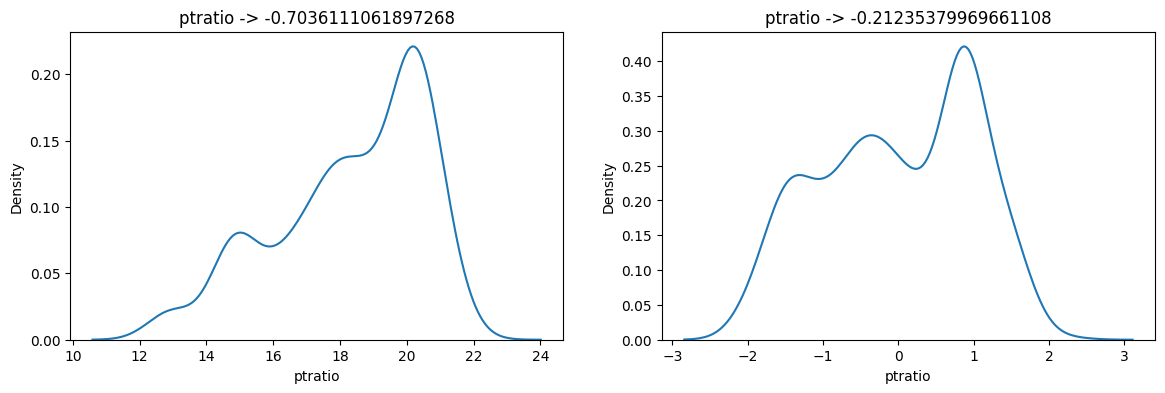

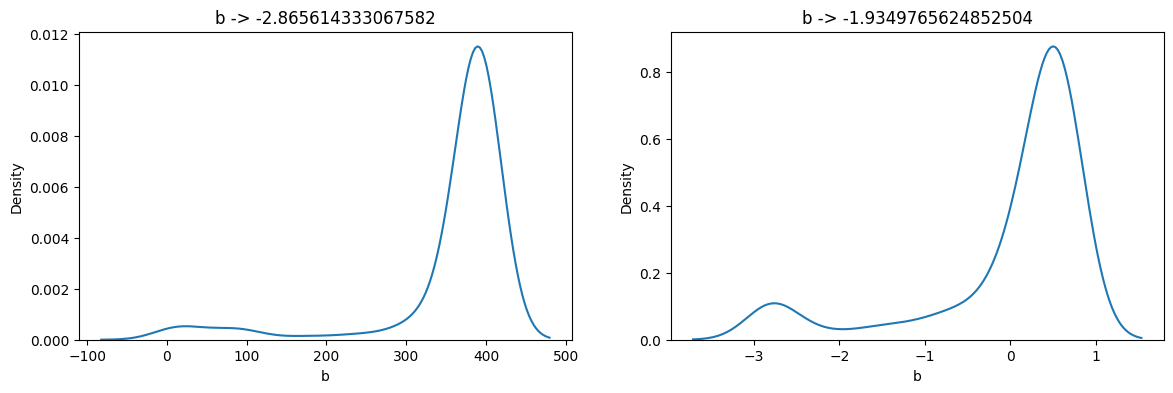

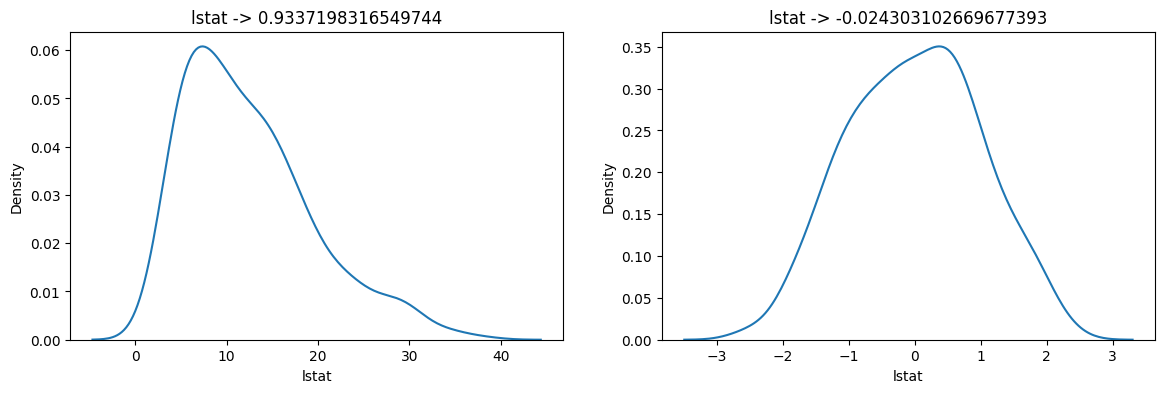

In [ ]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    txt = col + " -> " + str(X_train[col].skew())
    plt.title(txt)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    txt1 = col + " -> " + str(X_train_transformed[col].skew())
    plt.title(txt1)

    plt.show()

### Yeo-Johnson

In [ ]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.7314914118018747


,cols,Yeo_Johnson_lambdas
0,crim,-0.958995
1,zn,-0.867045
2,indus,0.332416
3,chas,-20.097985
4,nox,-4.033137
5,rm,-0.014434
6,age,1.388267
7,dis,-0.459648
8,rad,-0.367935
9,tax,-0.530210


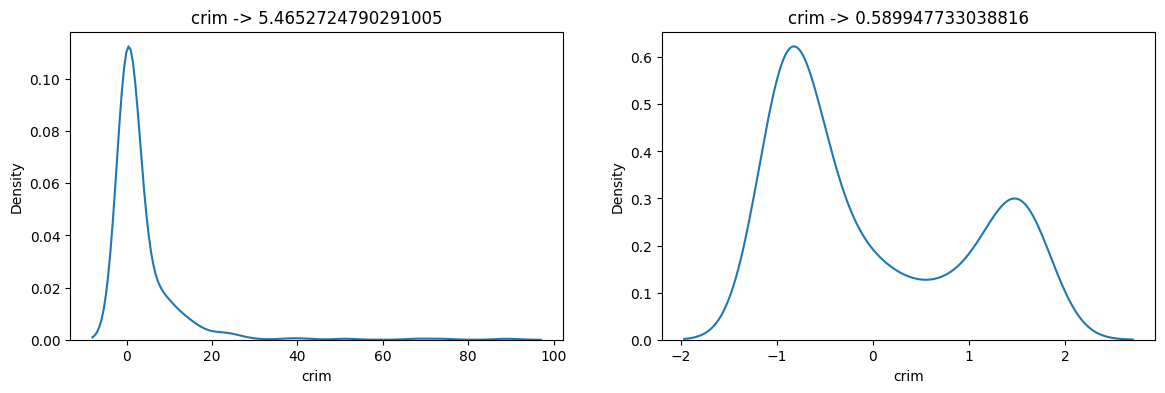

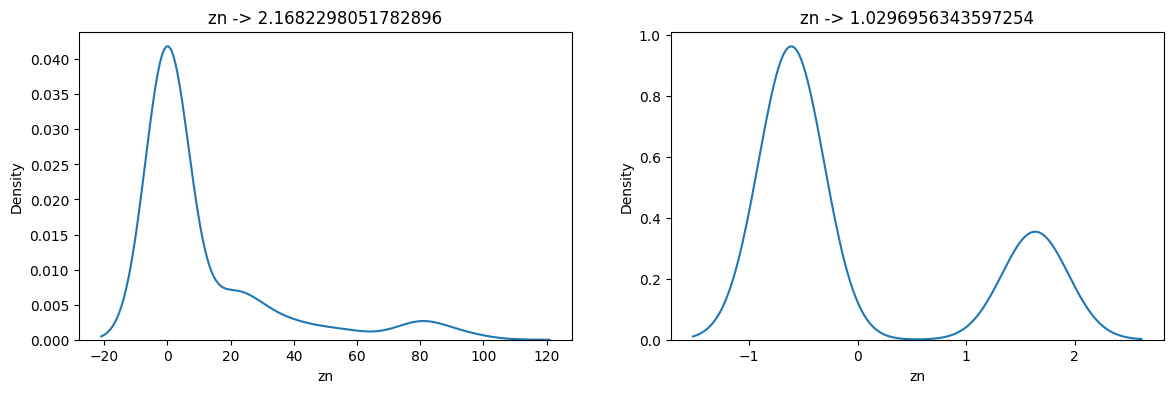

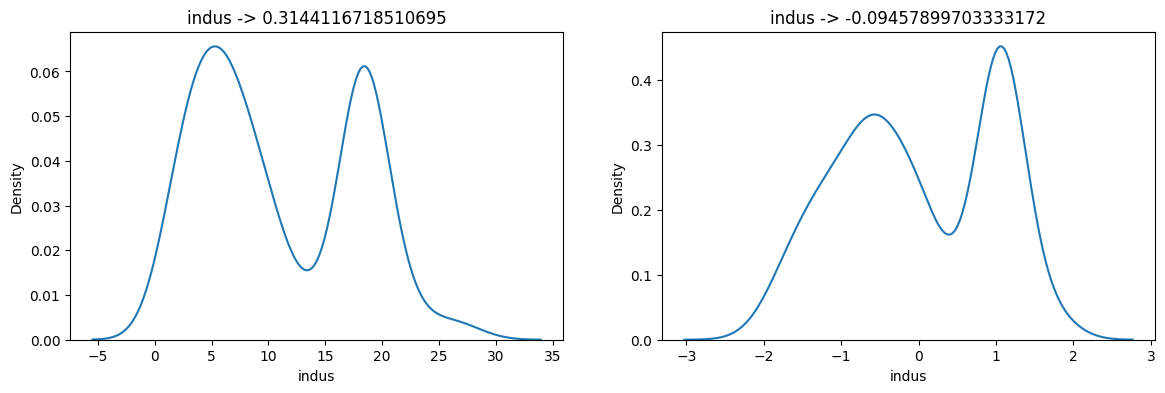

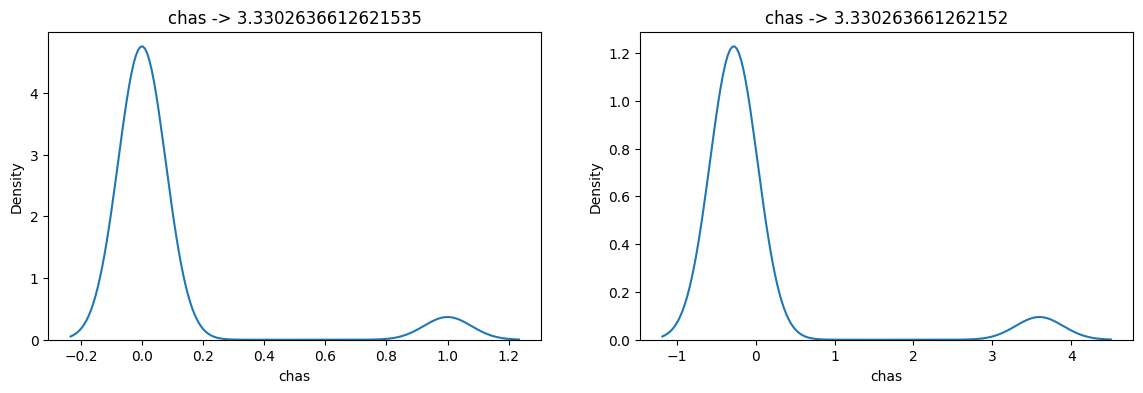

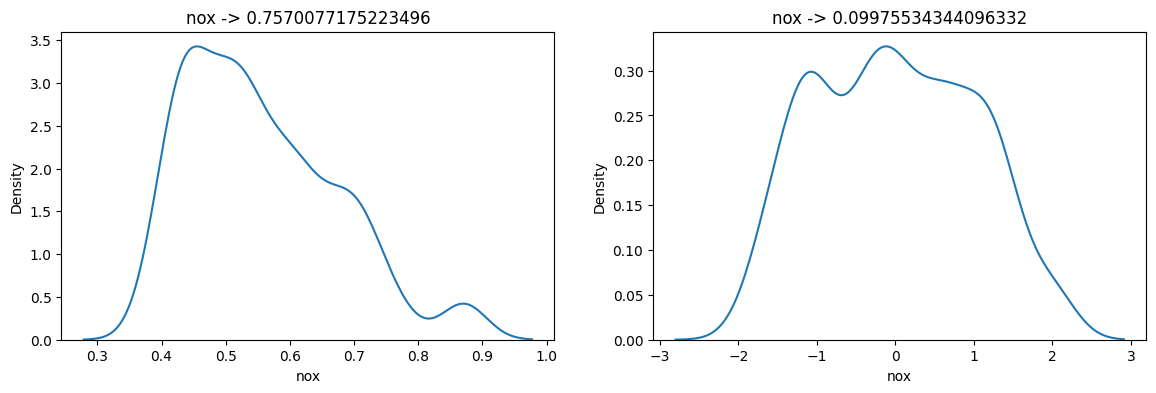

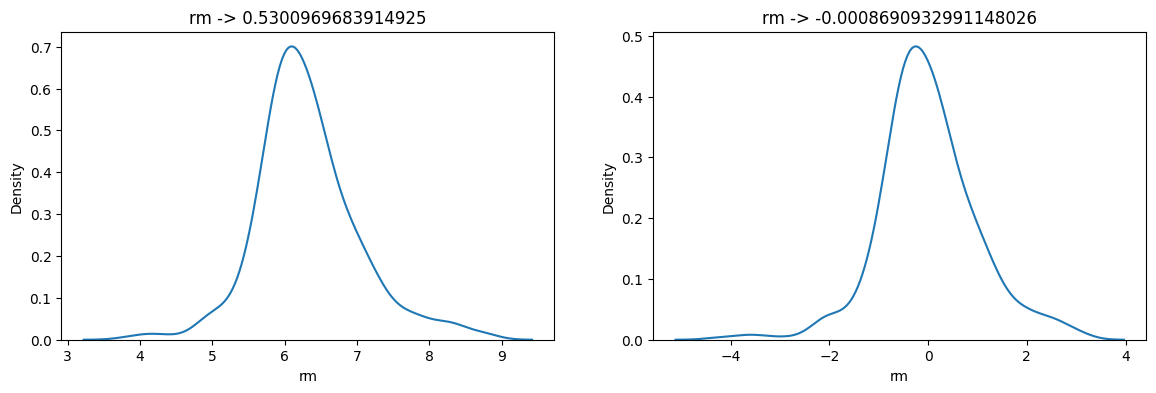

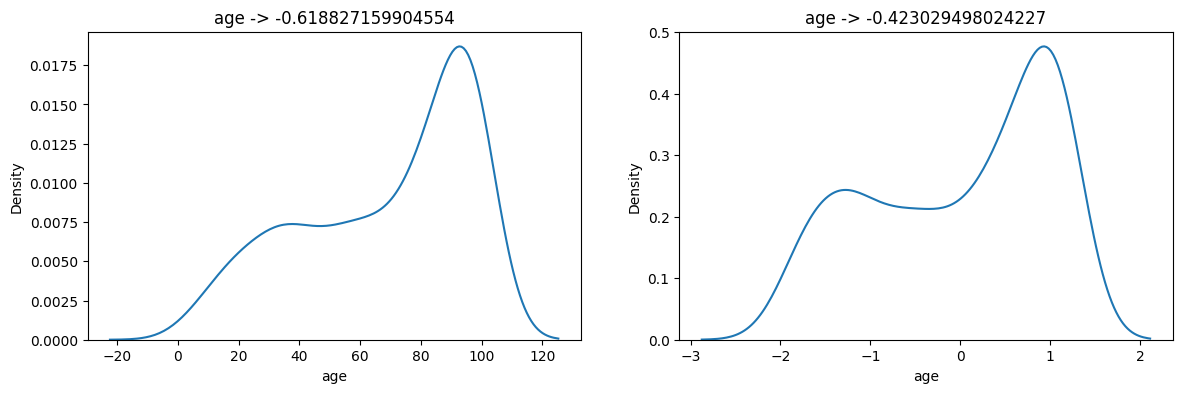

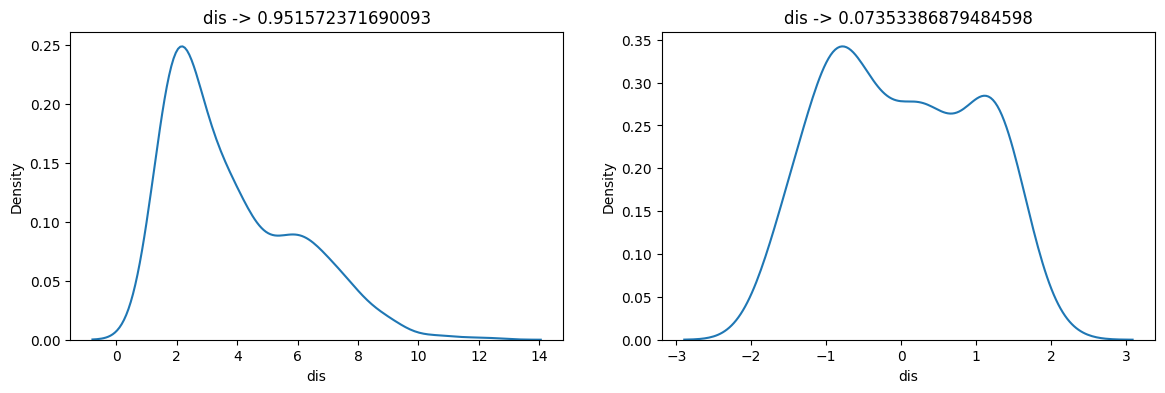

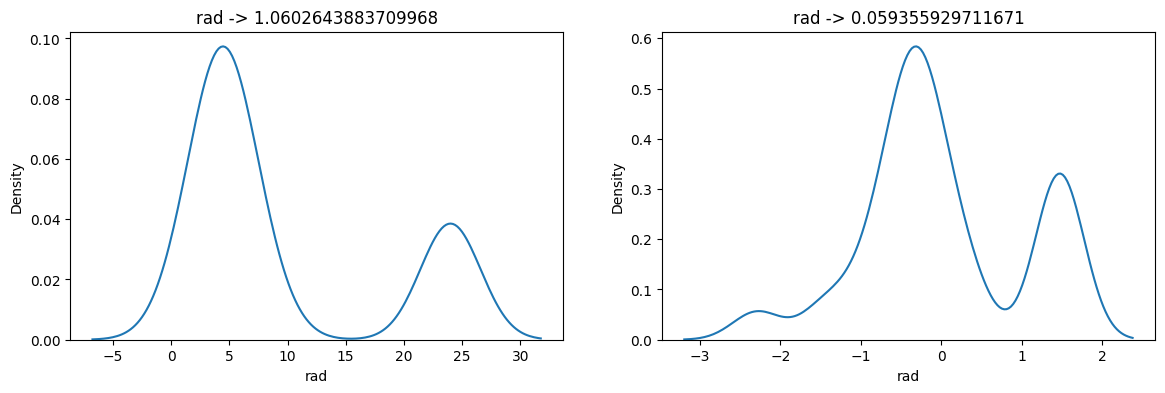

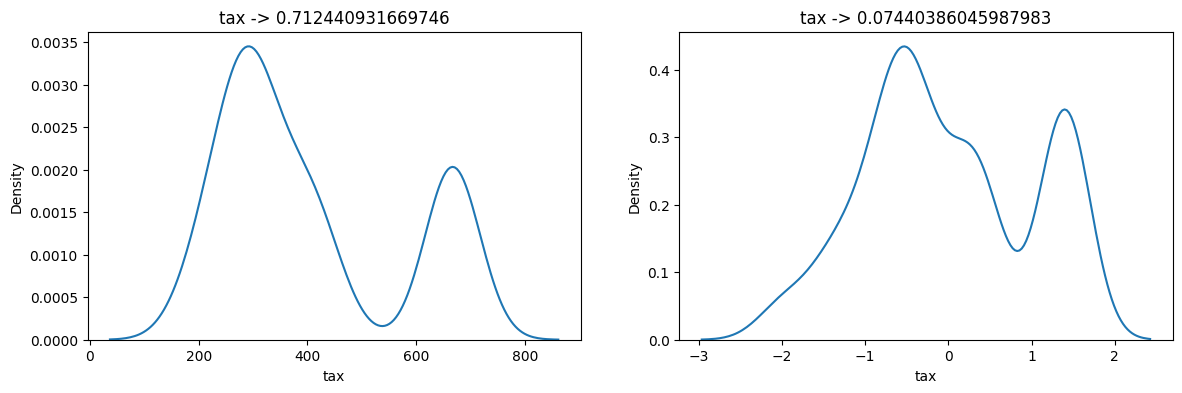

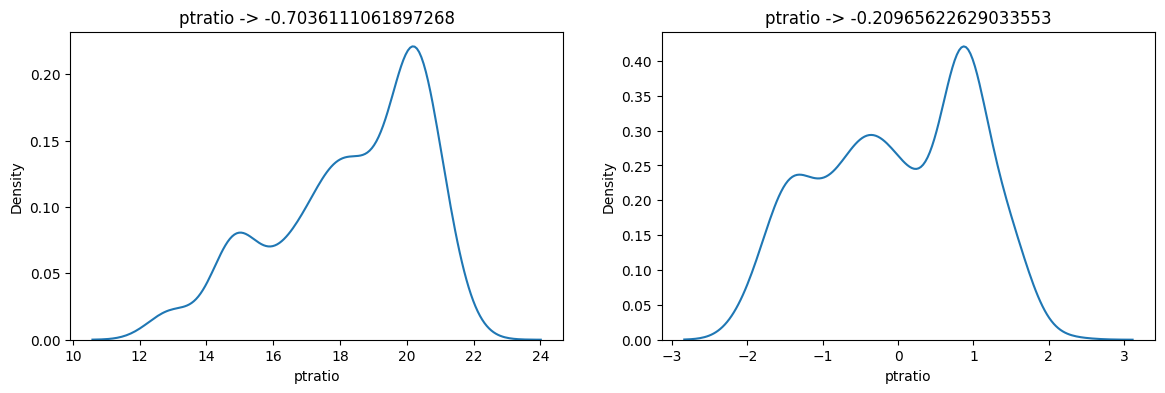

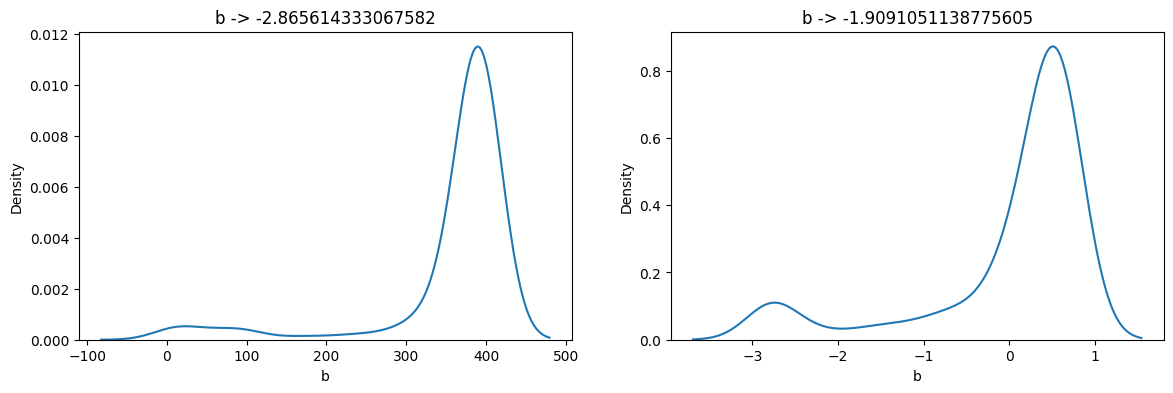

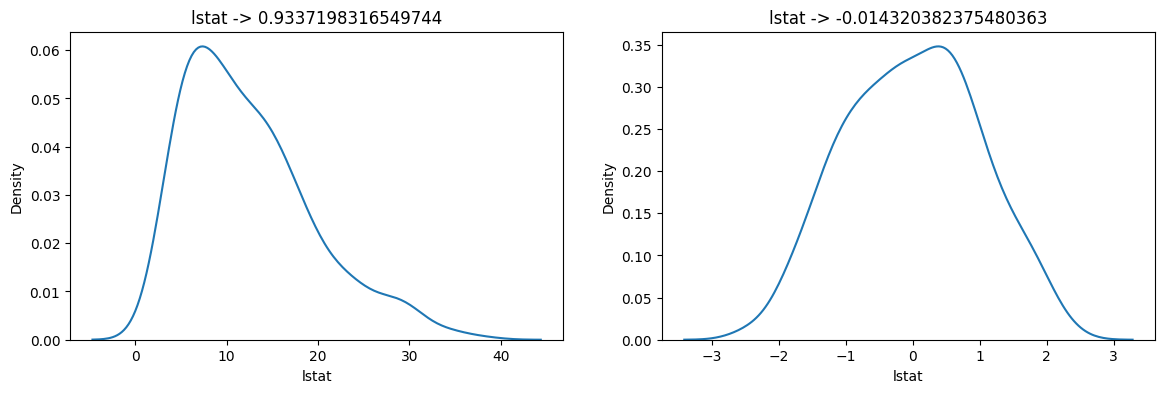

In [ ]:
# Before and after comparision for Box-Cox Plot
X_train_transformed2 = pd.DataFrame(X_train_transformed2 ,columns=X_train.columns)

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    txt = col + " -> " + str(X_train[col].skew())
    plt.title(txt)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed2[col])
    txt1 = col + " -> " + str(X_train_transformed2[col].skew())
    plt.title(txt1)

    plt.show()

In [ ]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,crim,-0.114374,-0.958995
1,zn,-0.181510,-0.867045
2,indus,0.389192,0.332416
3,chas,-1.008349,-20.097985
4,nox,-0.938023,-4.033137
5,rm,0.147907,-0.014434
6,age,1.362922,1.388267
7,dis,-0.165778,-0.459648
8,rad,-0.134975,-0.367935
9,tax,-0.526450,-0.530210
